In [ ]:
# --- Cell 1: Imports & Config ---
import osmnx as ox
import networkx as nx
import geopandas as gpd
import random
from shapely.geometry import LineString, mapping
import json

# Coordinates: Example (Empire State → East Village)
start_coords = (40.748817, -73.985428)
end_coords = (40.730610, -73.935242)

In [3]:
# --- Cell 2: Build the OSM network graph ---
# Create a pedestrian network around start_coords
G = ox.graph_from_point(start_coords, dist=3000, network_type="walk")
print(f"Graph has {len(G.nodes)} nodes and {len(G.edges)} edges")

Graph has 13977 nodes and 44352 edges


In [4]:
# --- Cell 3: Get the nearest nodes for start and end points ---
orig_node = ox.nearest_nodes(G, start_coords[1], start_coords[0])
dest_node = ox.nearest_nodes(G, end_coords[1], end_coords[0])
print(f"Origin Node: {orig_node}, Destination Node: {dest_node}")

Origin Node: 7782217001, Destination Node: 589100791


In [5]:
# --- Cell 4: Compute the shortest route based on length ---
route = nx.shortest_path(G, orig_node, dest_node, weight="length")
print(f"Route has {len(route)} nodes")

Route has 58 nodes


In [6]:
# --- Cell 5: Assign proxy environmental attributes to each edge ---
edges = []
for u, v in zip(route[:-1], route[1:]):
    data = G[u][v][0]
    geom = data.get(
        "geometry",
        LineString(
            [(G.nodes[u]["x"], G.nodes[u]["y"]), (G.nodes[v]["x"], G.nodes[v]["y"])]
        ),
    )

    # Simulate environmental values
    sun_exposure = round(random.uniform(0, 1), 2)
    shade_index = round(1 - sun_exposure, 2)
    wind_intensity = round(random.uniform(0, 1), 2)
    crowd_density = round(random.uniform(0, 1), 2)
    env_weight = round((sun_exposure + wind_intensity + crowd_density) / 3, 2)

    edges.append(
        {
            "geometry": geom,
            "length": data["length"],
            "sun": sun_exposure,
            "shade": shade_index,
            "wind": wind_intensity,
            "crowd": crowd_density,
            "env_weight": env_weight,
        }
    )

print(f"Processed {len(edges)} route segments with environmental proxies")

Processed 57 route segments with environmental proxies


In [7]:
# --- Cell 6: Compute average environmental values for entire route ---
avg_sun = round(sum(e["sun"] for e in edges) / len(edges), 2)
avg_wind = round(sum(e["wind"] for e in edges) / len(edges), 2)
avg_crowd = round(sum(e["crowd"] for e in edges) / len(edges), 2)
avg_shade = round(sum(e["shade"] for e in edges) / len(edges), 2)

summary = {
    "avgSun": avg_sun,
    "avgWind": avg_wind,
    "avgCrowd": avg_crowd,
    "avgShade": avg_shade,
}

print("Summary Floats for Wardrobe Panel:", summary)

Summary Floats for Wardrobe Panel: {'avgSun': 0.54, 'avgWind': 0.53, 'avgCrowd': 0.44, 'avgShade': 0.46}


In [9]:
# --- Cell 7: Export route with attributes as GeoJSON ---
import os

# Ensure data directory exists
output_dir = "../data"
os.makedirs(output_dir, exist_ok=True)

# Save GeoJSON
output_path = os.path.join(output_dir, "route_with_env.json")

with open(output_path, "w") as f:
    json.dump(geojson_data, f)

print(f"GeoJSON saved to {output_path}")

GeoJSON saved to ../data/route_with_env.json


<Axes: >

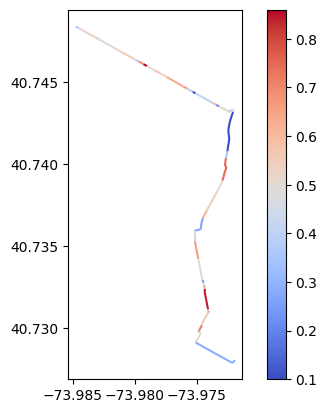

In [10]:
# --- Cell 8: Quick visualization for sanity check ---
gdf.plot(column="env_weight", cmap="coolwarm", legend=True)